## **Business Problem**
An insurance company wants to improve its cash flow forecasting by better predicting the life insurance premium using demographic and basic customer health risk metrics at the time of application.


##**Objective**
Build a machine learning model that can predict the premium for a life insurance based on customer's basic information.

##**Dataset Description**

**Age** : age of applicant (primary beneficiary)\
**Sex** : insurance contractor gender, female, male\
**BMI** : Body mass index is a person’s weight in kilograms divided by the square of height in meters. A high BMI can be an indicator of high body fatness.\
**Children** : Number of children or dependents\
**Smoker** : Smoking usage\
**Region** : Northeast, Southeast, Southwest, Northwest\
**Charges** : Life insurance premium based on the data given (target variable)



##**Import Libraries**

In [ ]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

##**Upload Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Hafizah/Insurance_dataset/main/insurance.csv') #read and upload our raw data

##**Data Inspection**

In [ ]:
# look at the first 5 rows of the dataset

df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# inspect the number of rows, coulmns, missing values and the data type

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# look at the statistical information and distribution of the dataset

df.describe(include='all') # use include all to look at the categorical features too

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


##**Data Wrangling**

In [ ]:
# convert categorical features into numerical features 

dummy=pd.get_dummies(df[['sex','smoker','region']]) 

In [ ]:
dummy

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [ ]:
# combine dummy variables with the original dataset

df2 = pd.concat([df,dummy], axis=1) 

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# drop unused columns

df2.drop(['sex','smoker','region','sex_male','smoker_no'], axis=1, inplace=True) #drop the variable features that we do not need

In [ ]:
# double check all columns are drop correctly

df2.head() 

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [ ]:
# rename columns 

df2= df2.rename(columns={'sex_female':'gender', 'smoker_yes':'smoker','region_northeast':'northeast', 'region_northwest':'northwest', 'region_southeast':'southeast', 'region_southwest':'southwest'}) # 1-female, 0-male, 1-smoker, 0- non smoker

In [ ]:
df2.head(3)

,age,bmi,children,charges,gender,smoker,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,1,1,0,0,0,1
1,18,33.77,1,1725.5523,0,0,0,0,1,0
2,28,33.00,3,4449.4620,0,0,0,0,1,0


In [ ]:
# rearrange columns - target variable is now the last column 

df2=df2[['age','bmi','children','gender','smoker','northeast','northwest','southeast','southwest','charges']]

In [ ]:
df2.head(1)

,age,bmi,children,gender,smoker,northeast,northwest,southeast,southwest,charges
0,19,27.9,0,1,1,0,0,0,1,16884.924


##**Exploratory Data Analysis**

####Pearson Correlation
- is used to measure the strength and direction (+/-) of the **linear relationship** between two variables.
- gives a quick idea of the potential usefulness of features.
- only valid for **continuous data**, not appropriate for a **binary response variable**.
- correlation (values in the table) are between **0** (not linearly correlated) and **1** or **-1** (highly correlated).

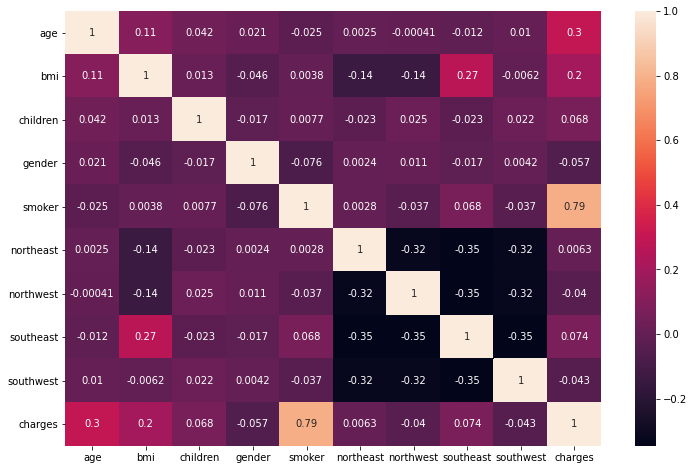

In [ ]:
# heatmap to investigate the realtionship between features and between features and target variable
# "smoker" feature is highly corralated with the target variable

plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True);

####Scatterplot Matrix
- similar to correlation plot.
- shows all data as a grid or scatter plots of all features and the response variable.
- examine data directly in a **concise format**.

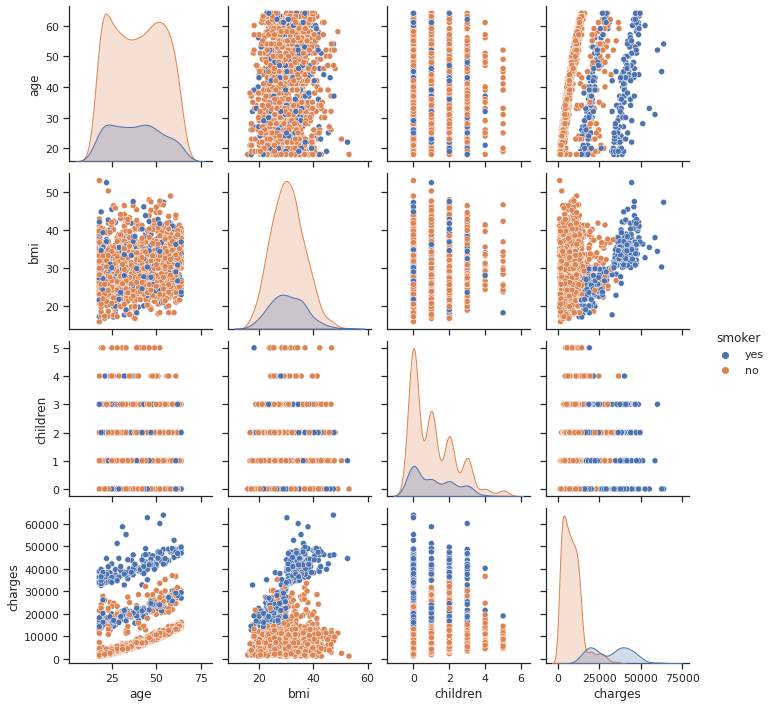

In [ ]:
# the scatterplot shows the relationship between numerical features and target class
# As the bmi increases, the charges increases.

sns.set_theme(style='ticks')
sns.pairplot(df,hue='smoker'); #include a pairplot of our x and y variables

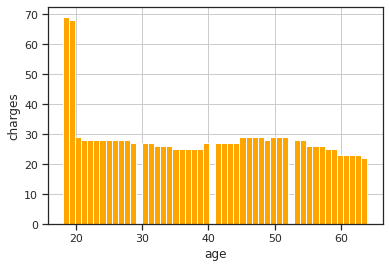

In [ ]:
# histogram of charges against age 
# applicants under the age of 20 pays more premium 

df2['age'].hist(bins=50, color='orange')
plt.xlabel('age')
plt.ylabel('charges');

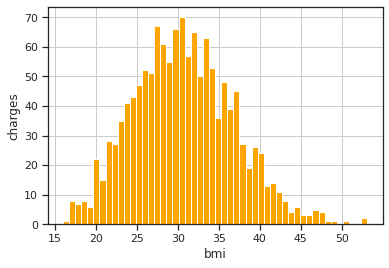

In [ ]:
# histogram of charges against bmi 

df2['bmi'].hist(bins=50, color='orange')
plt.xlabel('bmi')
plt.ylabel('charges');

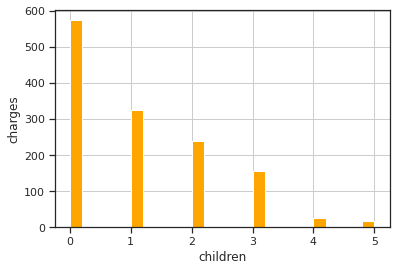

In [ ]:
# histogram of charges against children

df2['children'].hist(bins= 25, color='orange')
plt.xlabel('children')
plt.ylabel('charges');

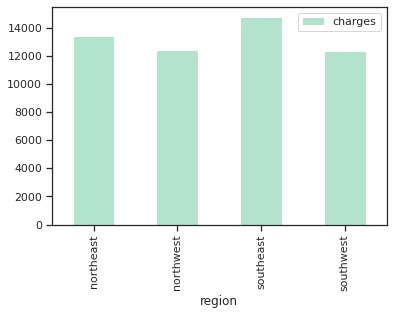

In [ ]:
# shows that the southeast region charges the highest premium, with a difference in premium of about $3000 compared to northwest and southwest

region_ = df.groupby('region').agg({'charges':np.mean})
region_.plot(kind='bar', colormap='Pastel2');

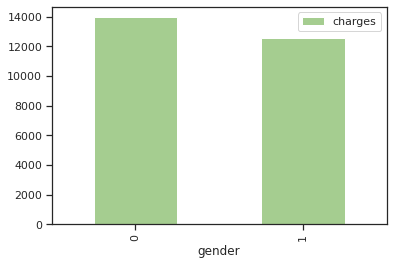

In [ ]:
# 1 --> female, 0 --> male
# show that male pays slightly higher premium than female

gender_ = df2.groupby('gender').agg({'charges':np.mean})
gender_.plot(kind='bar', colormap='crest');

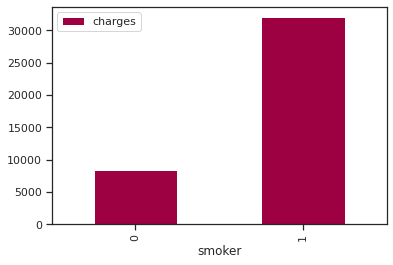

In [ ]:
# 1 --> smoker, 0 --> non-smoker
# shows that smoker pays a lot more premium with a difference of >$20000

smoker_ = df2.groupby('smoker').agg({'charges':np.mean})
smoker_.plot(kind='bar', colormap='Spectral');

##**Feature Selection**


####ANOVA F-test
- ANOVA stands for "analysis of variance".
- Used to test whether features are associated with a response

In [ ]:
# convert series into a list

features = df2.columns.tolist()
features

['age',
 'bmi',
 'children',
 'gender',
 'smoker',
 'northeast',
 'northwest',
 'southeast',
 'southwest',
 'charges']

In [ ]:
# pick feature columns and target columns

X = df2[features].iloc[:,:-1].values
y = df2[features].iloc[:,-1].values

In [ ]:
# check the shape of both variables are consistent

print(X.shape, y.shape)

(1338, 9) (1338,)


In [ ]:
# initiate the metrics used to evaluate model

[f_stat, f_p_value] = f_regression(X,y)

In [ ]:
# feature selection

df_test = pd.DataFrame({'Feature':features[:-1], 'F-Score':f_stat, 'p-value': f_p_value})
df_test.sort_values('p-value')

,Feature,F-Score,p-value
4,smoker,2177.614868,8.271436e-283
0,age,131.174013,4.886693e-29
1,bmi,54.709308,2.459086e-13
7,southeast,7.352531,6.782699e-03
2,children,6.206037,1.285213e-02
3,gender,4.399702,3.613272e-02
8,southwest,2.499121,1.141466e-01
6,northwest,2.130837,1.445970e-01
5,northeast,0.053852,8.165264e-01


##**Split Data & Feature Scaling**

In [ ]:
# initiate train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

In [ ]:
X_train.shape

(1070, 9)

In [ ]:
X_test.shape

(268, 9)

In [ ]:
# Initiate scaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0.41304348, 0.48802798, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.49690611, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10869565, 0.55716976, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47826087, 0.24535916, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.52649987, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32608696, 0.06833468, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_test = scaler.transform(X_test)

##**Build Model**
######**Linear Regression**

In [ ]:
# initiate regression model

regressor = LinearRegression()
lm = regressor.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

In [ ]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy of Linear Regression model = '+ str(round(accuracy,3))) 

Accuracy of Linear Regression model = 0.8


######**Random Forest Regression**

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=4)
rf = rf_reg.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
accuracy = rf_reg.score(X_test, y_test)
print('Accuracy of Random Forest model = '+ str(round(accuracy,3))) 

Accuracy of Random Forest model = 0.854


##**Save Model**

In [ ]:
# Save model - in binary mode
filename = 'Life insurance Model.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

##**Conclusion**
Random forest regression model produced better accuracy compared to linear regression model